In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

In [16]:
history_folder = "../history/coupled/"
#history_filenames = ["history_uncoupled_OG.nc",
#                    "history_uncoupled_MLP.nc",
#                    "history_uncoupled_MLP_400M.nc",
#                    "history_uncoupled_MLP_unbounded.nc"]

history_filenames = ["history_coupled_be.nc", "history_coupled_mlp_recurrant.nc", "history_coupled_mlp_recurrant_2.nc"]

histogram_filenames = ["histograms_coupled_be.nc", "histograms_coupled_mlp_recurrant.nc"]
history_file_count = len(history_filenames)
histogram_file_count = len(histogram_filenames)
history_names = [" ".join(filename.split(".")[0].split("_")[1:]).replace("-", " ") for filename in history_filenames]

history_auxiliary_variable_names = ["time", "zconc", "zw", "tnumpart"]

history_variable_names = ["meanRH",
                  "radavg",
                  "Tpmean_average",
                  "Tfmean_average",
                  "tnumpart"]
history_variable_labels = ["Volume-average relative humidity [%]",
                   "Average radius of all particles [m]",
                   "Average temperature of all particles [K]",
                   "Average air temperature of all particles [K]",
                   "Number of particles [#]"]
history_averaged_variables = ["Tpmean", "Tfmean"]

history_variable_scales = [(0.0, 0.0),
                           (0.0, 0.0),
                           (289.5, 290.5),
                           (289.5, 290.5),
                           (0.0, 0.0)]

histogram_time_step = 20

In [17]:
histogram_files = [Dataset(history_folder + filename, mode='a') for filename in histogram_filenames]

histogram_variable_names = ["rad", "tp"]
histogram_variables = [[[file.variables[varname + "bins"][:],[file.variables[varname + "hist"][:]]] for file in histogram_files] for varname in histogram_variable_names]

histogram_times = [file.variables["time"][:] for file in histogram_files]
histogram_samples = [i*histogram_time_step + 3 for i in range(len(histogram_times[0])//histogram_time_step + 1)]
#histogram_samples = [5,6,7,8,10,13,18,23]



In [18]:
history_files = [Dataset(history_folder + filename, mode='a') for filename in history_filenames]
history_auxiliary_variables = [[file.variables[varname][:] for file in history_files] for varname in history_auxiliary_variable_names]

In [19]:
for v in history_averaged_variables:
    for i, file in enumerate(history_files):
        layer_volumes = 4*(history_auxiliary_variables[2][i][1:] -  history_auxiliary_variables[2][i][:-1])
        
        variable = file.variables[v]
        if v + "_average" in file.variables.keys():
            average_variable = file.variables[v + "_average"]
        else:
            average_variable = file.createVariable(v + "_average", np.float64, ('time',))
        average_variable[:] = (variable * layer_volumes * history_auxiliary_variables[1][i]).sum(axis=1) / history_auxiliary_variables[3][i]

In [20]:

history_variables = [[file.variables[varname][:] for file in history_files] for varname in history_variable_names]

Text(0.5, 0.98, 'History graphs of network box uncoupled 400M l1 recurrant 6 epochs against NTLP history - sha: bd15077972b2e0a085b484b301d0d847b54fc527')

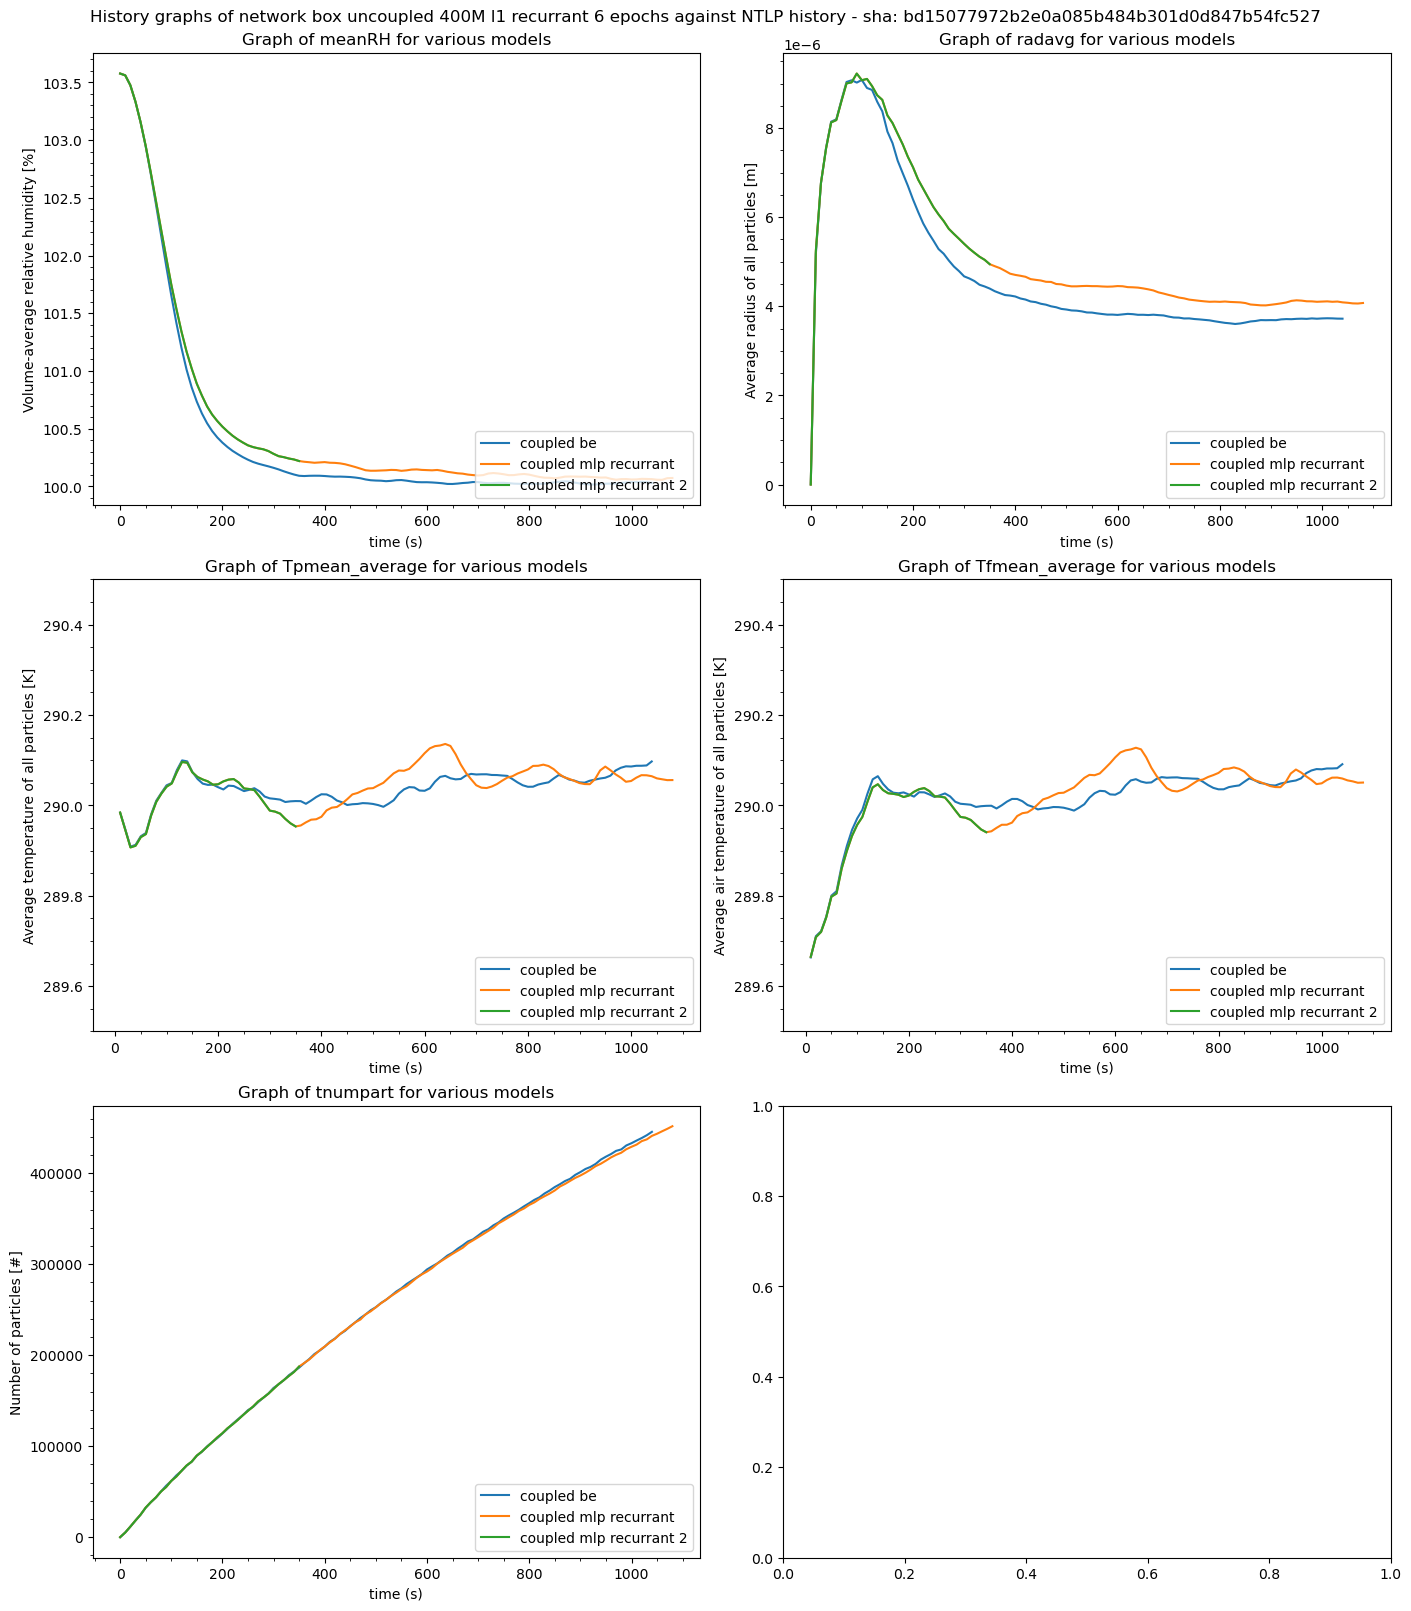

In [ ]:
fig, axs = plt.subplots((len(history_variables)+1)//2, 2, constrained_layout=True)
fig.set_figheight(16)
fig.set_figwidth(14)

for i in range(0,len(history_variables)):
    index = [i//2, i%2]
    for j in range(history_file_count):
        axs[*index].plot(history_auxiliary_variables[0][j], history_variables[i][j])
    for t in histogram_samples:
        axs[*index].axvspan(history_auxiliary_variables[0][0][t], history_auxiliary_variables[0][0][t]+5, facecolor='lightgray', alpha=0.8)
    
    axs[*index].legend(history_names, loc="lower right")
    axs[*index].set_title("Graph of " + history_variable_names[i] + " for various models")
    axs[*index].set(xlabel="time (s)", ylabel=history_variable_labels[i])
    if history_variable_scales[i] != (0.0,0.0):
        axs[*index].set(ylim = history_variable_scales[i])
    axs[*index].minorticks_on()

fig.suptitle("History graphs of network box uncoupled 400M l1 recurrant 6 epochs against NTLP history - sha: bd15077972b2e0a085b484b301d0d847b54fc527")


Histogram:  3
Histogram:  23
Histogram:  43
Histogram:  63
Histogram:  83
Histogram:  103


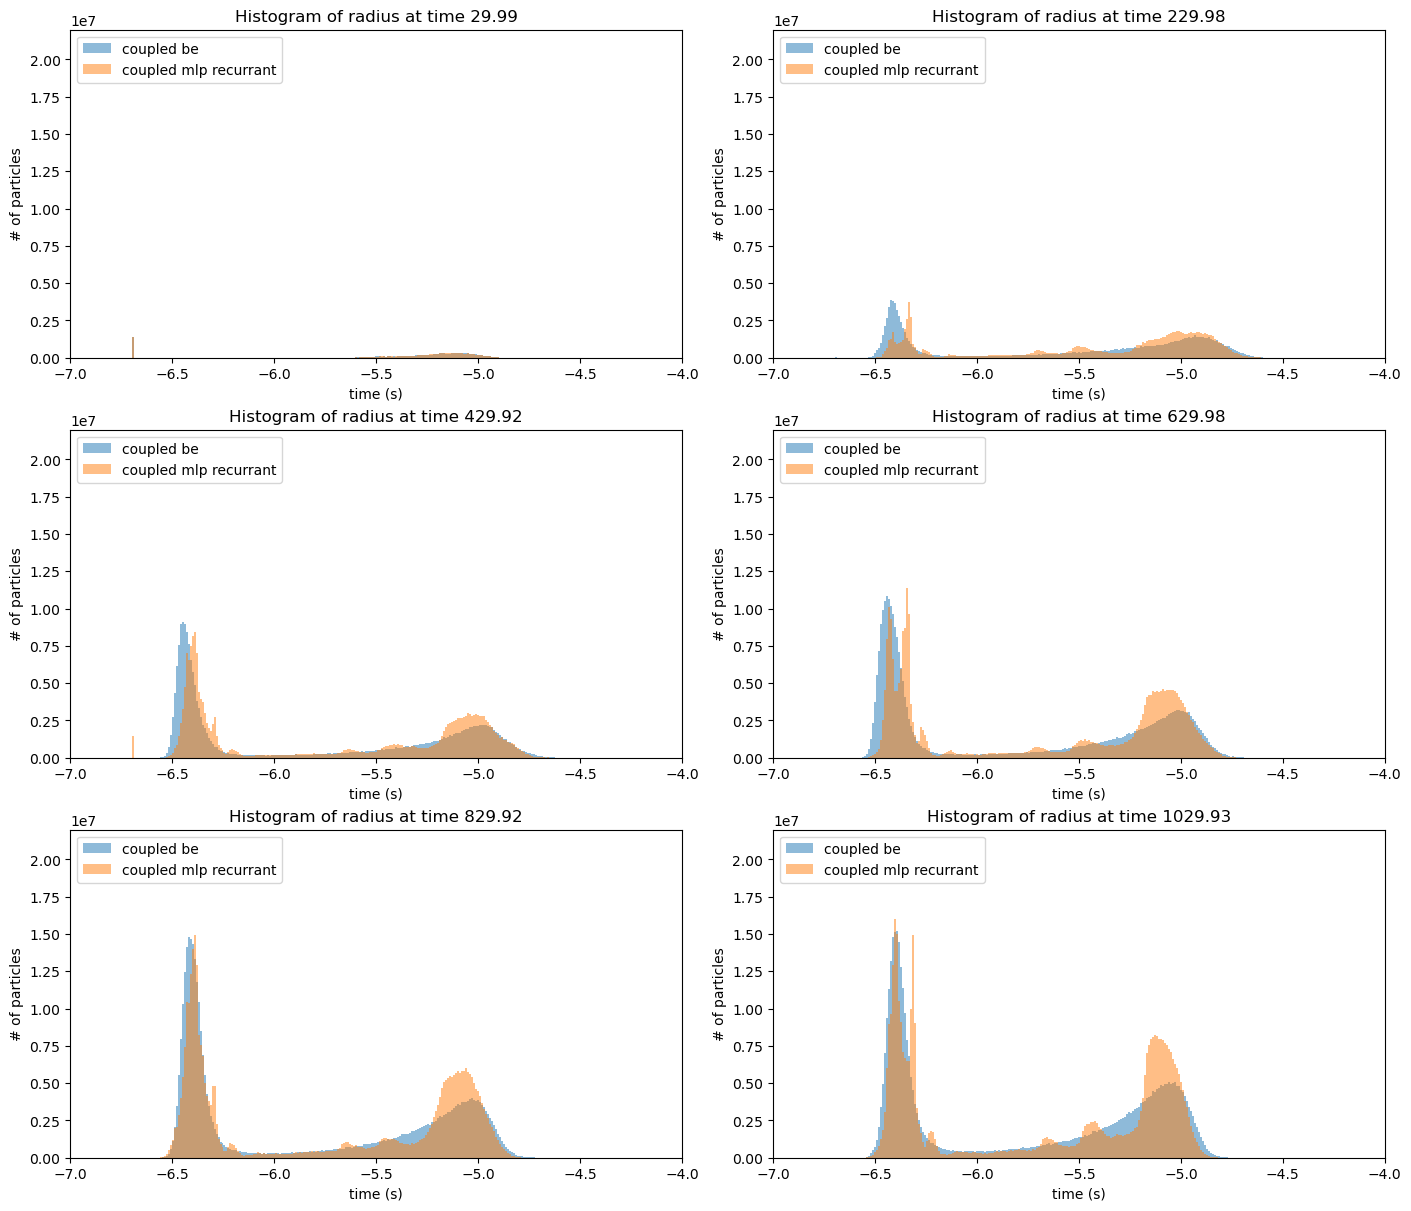

In [22]:
histogram_count = len(histogram_samples)
# NOTE may note have the same number of histograms - fix later. Probably take the min across all

fig, axs = plt.subplots(np.ceil(histogram_count/2.0).astype(int), 2, constrained_layout=True)
fig.set_figheight(12)
fig.set_figwidth(14)
for i,sample in enumerate(histogram_samples):
    print("Histogram: ", sample)
    index = [i//2, i%2]
    for j in range(histogram_file_count):
        counts = histogram_variables[0][j][1][0][sample]
        bins = histogram_variables[0][j][0]
        
        axs[*index].hist(bins[:len(counts)],bins=bins, weights=counts, alpha=0.5)
    axs[*index].legend(history_names, loc="upper left")
    #axs[*index].axvspan(-4.2757, 0, facecolor='lightgray', alpha=0.8)
    axs[*index].set_title(f"Histogram of radius at time {histogram_times[0][sample]:.2f}")
    axs[*index].set(xlabel="time (s)", ylabel="# of particles", xlim=(-7,-4.0), ylim=(0.0,22000000))

Histogram:  3
Histogram:  23
Histogram:  43
Histogram:  63
Histogram:  83
Histogram:  103


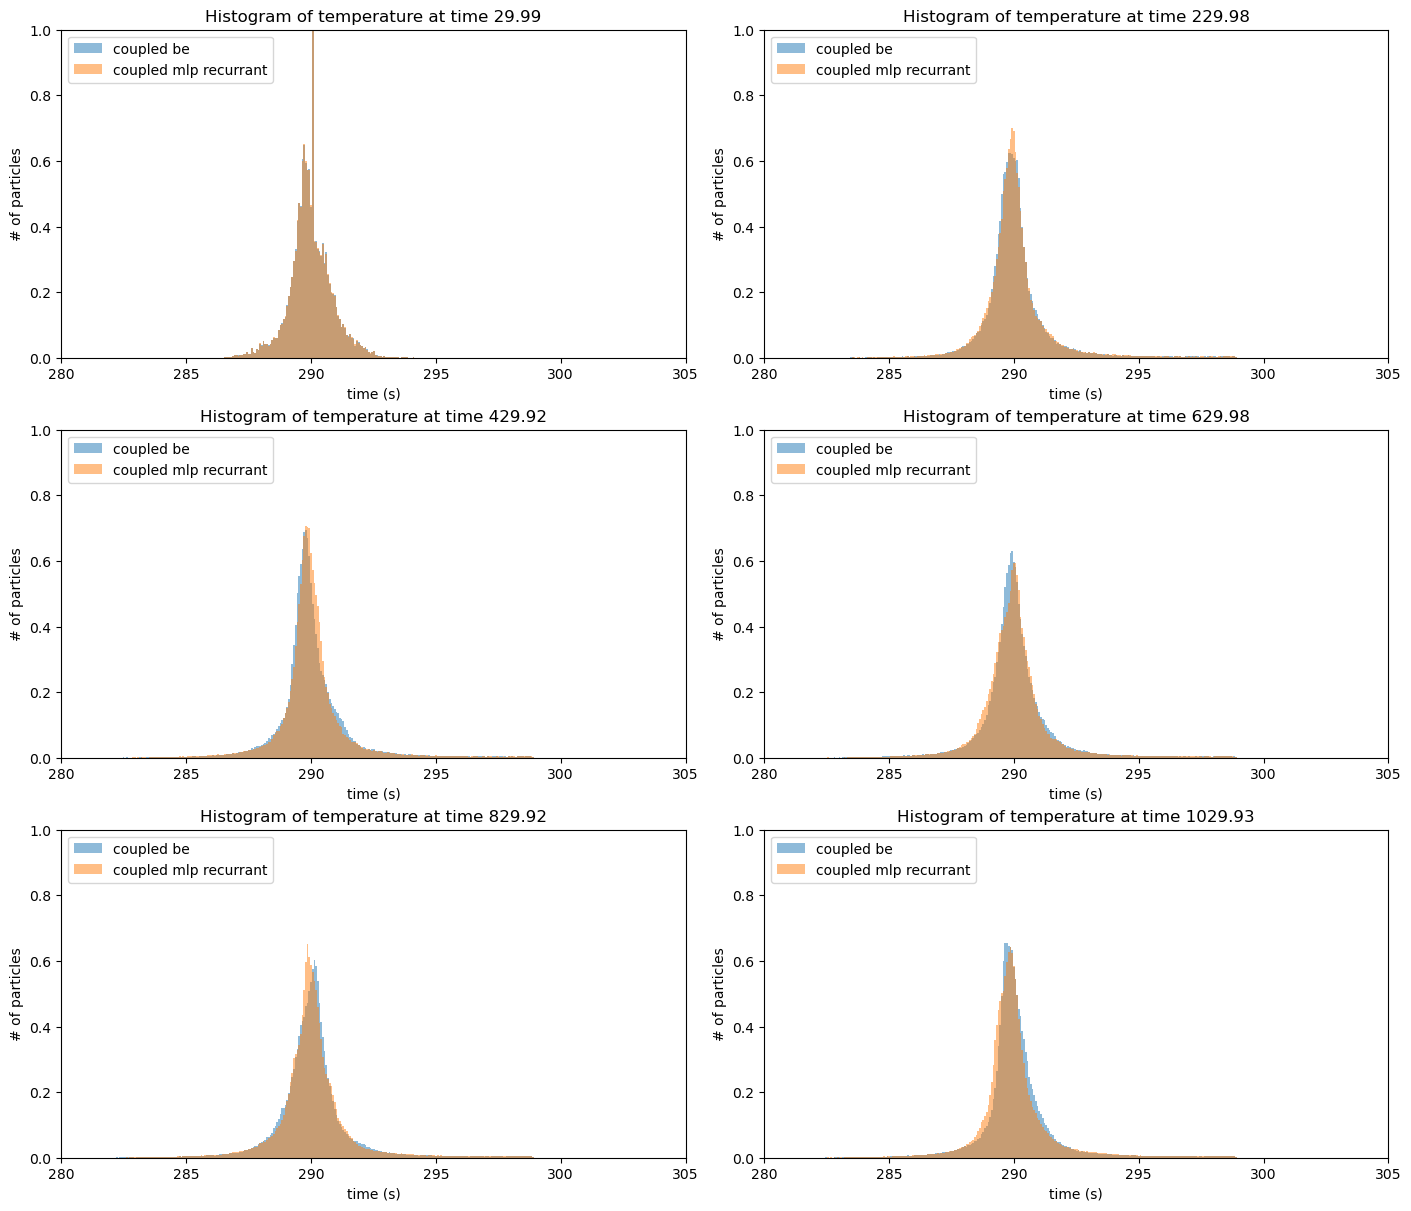

In [17]:
fig, axs = plt.subplots(np.ceil(len(histogram_samples)/2.0).astype(int), 2, constrained_layout=True)
fig.set_figheight(12)
fig.set_figwidth(14)
for i,sample in enumerate(histogram_samples):
    print("Histogram: ", sample)
    index = [i//2, i%2]
    for j in range(histogram_file_count):
        counts = histogram_variables[1][j][1][0][sample]
        bins = histogram_variables[1][j][0]

        bins = 10**bins

        axs[*index].hist(bins[:len(counts)],bins=bins, weights=counts, alpha=0.5, density=True)
    axs[*index].legend(history_names, loc="upper left")
    axs[*index].set_title(f"Histogram of temperature at time {histogram_times[0][sample]:.2f}")
    axs[*index].set(xlabel="time (s)", ylabel="# of particles", xlim=(280,305), ylim=(0.0,1.0))

plt.show()